# Tensorflow

## 1. Introduction

TensorFlow is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

Tensors are kind of like Numpy Arrays (n-dimensional). Used to represent:
- Numbers
- Text
- Images
- Or other form of information



In [1]:
import tensorflow as tf

2024-04-12 21:54:16.200215: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 21:54:16.274760: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 21:54:16.274859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 21:54:16.277706: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 21:54:16.290415: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 21:54:16.291802: I tensorflow/core/platform/cpu_feature_guard.cc:1

2024-04-12 21:54:20.304451: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Create a rank 0 tensor (scalar)
scalar = tf.constant(7)
scalar, scalar.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=7>, 0)

In [3]:
# Create a vector
vector = tf.constant([2, 1])
vector, vector.ndim

(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 1], dtype=int32)>, 1)

## 2. Regression with Neural Networks

In [4]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


**Creating data to view and fit**

(TensorShape([100, 1]), TensorShape([100, 1]))

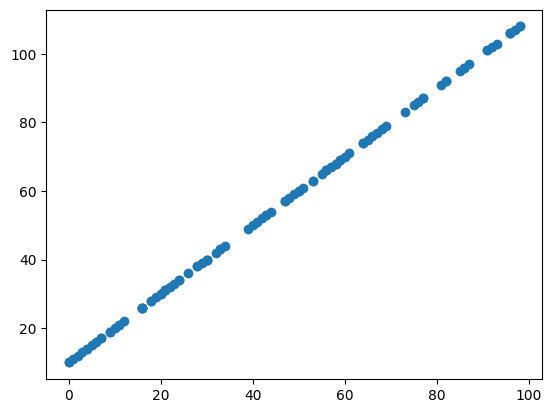

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.random.randint(0, 100, (100, 1))
y = X + 10

# Visualize
plt.scatter(X, y)

# Convert Numpy array's into Tensors
X = tf.constant(X)
y = tf.constant(y)

X.shape, y.shape

Input and Output Shapes

In [6]:
# Sample dataset
X = tf.range(-100, 100, 2)
y = X + 10
X_train, X_test = X[:70], X[70:]
y_train, y_test = y[:70], y[70:]

**Steps in modelling with Tensorflow**

1. Creating a model - definne the input, output and hidden layers.
2. Compile a model - define loss function, optimizer and evaluation metrics.
3. Fitting a model - letting model to find patterns between X & y.

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape = (1, ), activation='relu', name='hidden1'),
    tf.keras.layers.Dense(5, activation='relu', name='hidden2'),
    tf.keras.layers.Dense(5, activation='relu', name='hidden3'),
    tf.keras.layers.Dense(1, name='output')
], name="model")

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = 'mae')

# 3. Fit the model
model.fit(X_train, y_train, epochs=50)

Epoch 1/50


1/3 [=========>....................] - ETA: 2s - loss: 38.8645 - mae: 38.8645

3/3 [==============================] - 1s 7ms/step - loss: 35.5119 - mae: 35.5119


Epoch 2/50


1/3 [=========>....................] - ETA: 0s - loss: 36.1731 - mae: 36.1731

3/3 [==============================] - 0s 5ms/step - loss: 33.5957 - mae: 33.5957


Epoch 3/50


1/3 [=========>....................] - ETA: 0s - loss: 29.8617 - mae: 29.8617

3/3 [==============================] - 0s 4ms/step - loss: 31.1423 - mae: 31.1423


Epoch 4/50


1/3 [=========>....................] - ETA: 0s - loss: 33.1571 - mae: 33.1571

3/3 [==============================] - 0s 5ms/step - loss: 30.6729 - mae: 30.6729


Epoch 5/50


1/3 [=========>....................] - ETA: 0s - loss: 32.4189 - mae: 32.4189

3/3 [==============================] - 0s 4ms/step - loss: 30.7701 - mae: 30.7701


Epoch 6/50


1/3 [=========>....................] - ETA: 0s - loss: 35.1949 - mae: 35.1949

3/3 [==============================] - 0s 4ms/step - loss: 31.2172 - mae: 31.2172


Epoch 7/50


1/3 [=========>....................] - ETA: 0s - loss: 22.5678 - mae: 22.5678

3/3 [==============================] - 0s 4ms/step - loss: 31.3881 - mae: 31.3881


Epoch 8/50


1/3 [=========>....................] - ETA: 0s - loss: 32.9032 - mae: 32.9032

3/3 [==============================] - 0s 4ms/step - loss: 30.4555 - mae: 30.4555


Epoch 9/50


1/3 [=========>....................] - ETA: 0s - loss: 24.7929 - mae: 24.7929

3/3 [==============================] - 0s 4ms/step - loss: 31.1253 - mae: 31.1253


Epoch 10/50


1/3 [=========>....................] - ETA: 0s - loss: 34.9557 - mae: 34.9557

3/3 [==============================] - 0s 4ms/step - loss: 29.8158 - mae: 29.8158


Epoch 11/50


1/3 [=========>....................] - ETA: 0s - loss: 31.3921 - mae: 31.3921

3/3 [==============================] - 0s 4ms/step - loss: 29.6985 - mae: 29.6985


Epoch 12/50


1/3 [=========>....................] - ETA: 0s - loss: 28.8511 - mae: 28.8511

3/3 [==============================] - 0s 4ms/step - loss: 29.4752 - mae: 29.4752


Epoch 13/50


1/3 [=========>....................] - ETA: 0s - loss: 33.6792 - mae: 33.6792

3/3 [==============================] - 0s 4ms/step - loss: 30.6087 - mae: 30.6087


Epoch 14/50


1/3 [=========>....................] - ETA: 0s - loss: 21.4778 - mae: 21.4778

3/3 [==============================] - 0s 4ms/step - loss: 30.8908 - mae: 30.8908


Epoch 15/50


1/3 [=========>....................] - ETA: 0s - loss: 30.4638 - mae: 30.4638

3/3 [==============================] - 0s 4ms/step - loss: 30.3128 - mae: 30.3128


Epoch 16/50


1/3 [=========>....................] - ETA: 0s - loss: 29.3762 - mae: 29.3762

3/3 [==============================] - 0s 4ms/step - loss: 29.2103 - mae: 29.2103


Epoch 17/50


1/3 [=========>....................] - ETA: 0s - loss: 30.5466 - mae: 30.5466

3/3 [==============================] - 0s 4ms/step - loss: 31.1954 - mae: 31.1954


Epoch 18/50


1/3 [=========>....................] - ETA: 0s - loss: 28.4861 - mae: 28.4861

3/3 [==============================] - 0s 4ms/step - loss: 29.5505 - mae: 29.5505


Epoch 19/50


1/3 [=========>....................] - ETA: 0s - loss: 29.7030 - mae: 29.7030

3/3 [==============================] - 0s 4ms/step - loss: 30.8567 - mae: 30.8567


Epoch 20/50


1/3 [=========>....................] - ETA: 0s - loss: 32.2295 - mae: 32.2295

3/3 [==============================] - 0s 4ms/step - loss: 30.0509 - mae: 30.0509


Epoch 21/50


1/3 [=========>....................] - ETA: 0s - loss: 30.8216 - mae: 30.8216

3/3 [==============================] - 0s 4ms/step - loss: 29.2979 - mae: 29.2979


Epoch 22/50


1/3 [=========>....................] - ETA: 0s - loss: 36.7996 - mae: 36.7996

3/3 [==============================] - 0s 4ms/step - loss: 28.1848 - mae: 28.1848


Epoch 23/50


1/3 [=========>....................] - ETA: 0s - loss: 27.4505 - mae: 27.4505

3/3 [==============================] - 0s 4ms/step - loss: 28.1844 - mae: 28.1844


Epoch 24/50


1/3 [=========>....................] - ETA: 0s - loss: 32.5558 - mae: 32.5558

3/3 [==============================] - 0s 4ms/step - loss: 28.1056 - mae: 28.1056


Epoch 25/50


1/3 [=========>....................] - ETA: 0s - loss: 26.4993 - mae: 26.4993

3/3 [==============================] - 0s 4ms/step - loss: 27.9362 - mae: 27.9362


Epoch 26/50


1/3 [=========>....................] - ETA: 0s - loss: 22.2666 - mae: 22.2666

3/3 [==============================] - 0s 4ms/step - loss: 27.0195 - mae: 27.0195


Epoch 27/50


1/3 [=========>....................] - ETA: 0s - loss: 25.9235 - mae: 25.9235

3/3 [==============================] - 0s 4ms/step - loss: 26.8508 - mae: 26.8508


Epoch 28/50


1/3 [=========>....................] - ETA: 0s - loss: 21.0750 - mae: 21.0750

3/3 [==============================] - 0s 4ms/step - loss: 26.1546 - mae: 26.1546


Epoch 29/50


1/3 [=========>....................] - ETA: 0s - loss: 27.1622 - mae: 27.1622

3/3 [==============================] - 0s 4ms/step - loss: 26.0827 - mae: 26.0827


Epoch 30/50


1/3 [=========>....................] - ETA: 0s - loss: 27.0027 - mae: 27.0027

3/3 [==============================] - 0s 4ms/step - loss: 27.6784 - mae: 27.6784


Epoch 31/50


1/3 [=========>....................] - ETA: 0s - loss: 30.0827 - mae: 30.0827

3/3 [==============================] - 0s 4ms/step - loss: 27.2131 - mae: 27.2131


Epoch 32/50


1/3 [=========>....................] - ETA: 0s - loss: 21.8600 - mae: 21.8600

3/3 [==============================] - 0s 4ms/step - loss: 27.6427 - mae: 27.6427


Epoch 33/50


1/3 [=========>....................] - ETA: 0s - loss: 28.1251 - mae: 28.1251

3/3 [==============================] - 0s 4ms/step - loss: 27.4856 - mae: 27.4856


Epoch 34/50


1/3 [=========>....................] - ETA: 0s - loss: 20.7876 - mae: 20.7876

3/3 [==============================] - 0s 4ms/step - loss: 26.5243 - mae: 26.5243


Epoch 35/50


1/3 [=========>....................] - ETA: 0s - loss: 23.5024 - mae: 23.5024

3/3 [==============================] - 0s 4ms/step - loss: 25.6910 - mae: 25.6910


Epoch 36/50


1/3 [=========>....................] - ETA: 0s - loss: 28.8993 - mae: 28.8993

3/3 [==============================] - 0s 4ms/step - loss: 25.8206 - mae: 25.8206


Epoch 37/50


1/3 [=========>....................] - ETA: 0s - loss: 26.8270 - mae: 26.8270

3/3 [==============================] - 0s 4ms/step - loss: 24.9074 - mae: 24.9074


Epoch 38/50


1/3 [=========>....................] - ETA: 0s - loss: 23.8852 - mae: 23.8852

3/3 [==============================] - 0s 4ms/step - loss: 24.9491 - mae: 24.9491


Epoch 39/50


1/3 [=========>....................] - ETA: 0s - loss: 30.9292 - mae: 30.9292

3/3 [==============================] - 0s 4ms/step - loss: 24.5334 - mae: 24.5334


Epoch 40/50


1/3 [=========>....................] - ETA: 0s - loss: 27.1868 - mae: 27.1868

3/3 [==============================] - 0s 4ms/step - loss: 24.2752 - mae: 24.2752


Epoch 41/50


1/3 [=========>....................] - ETA: 0s - loss: 27.9376 - mae: 27.9376

3/3 [==============================] - 0s 4ms/step - loss: 23.9306 - mae: 23.9306


Epoch 42/50


1/3 [=========>....................] - ETA: 0s - loss: 24.2558 - mae: 24.2558

3/3 [==============================] - 0s 4ms/step - loss: 23.7764 - mae: 23.7764


Epoch 43/50


1/3 [=========>....................] - ETA: 0s - loss: 31.6650 - mae: 31.6650

3/3 [==============================] - 0s 4ms/step - loss: 23.5526 - mae: 23.5526


Epoch 44/50


1/3 [=========>....................] - ETA: 0s - loss: 24.4720 - mae: 24.4720

3/3 [==============================] - 0s 4ms/step - loss: 23.8878 - mae: 23.8878


Epoch 45/50


1/3 [=========>....................] - ETA: 0s - loss: 23.6922 - mae: 23.6922

3/3 [==============================] - 0s 4ms/step - loss: 25.3066 - mae: 25.3066


Epoch 46/50


1/3 [=========>....................] - ETA: 0s - loss: 18.7754 - mae: 18.7754

3/3 [==============================] - 0s 4ms/step - loss: 23.9142 - mae: 23.9142


Epoch 47/50


1/3 [=========>....................] - ETA: 0s - loss: 19.9239 - mae: 19.9239

3/3 [==============================] - 0s 4ms/step - loss: 23.4367 - mae: 23.4367


Epoch 48/50


1/3 [=========>....................] - ETA: 0s - loss: 21.2266 - mae: 21.2266

3/3 [==============================] - 0s 4ms/step - loss: 22.6461 - mae: 22.6461


Epoch 49/50


1/3 [=========>....................] - ETA: 0s - loss: 18.2067 - mae: 18.2067

3/3 [==============================] - 0s 4ms/step - loss: 22.5908 - mae: 22.5908


Epoch 50/50


1/3 [=========>....................] - ETA: 0s - loss: 29.6499 - mae: 29.6499

3/3 [==============================] - 0s 4ms/step - loss: 25.1669 - mae: 25.1669


In [8]:
model.predict([40])

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 153ms/step


array([[34.245274]], dtype=float32)

In [9]:
model.summary()

Model: "model"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 hidden1 (Dense)             (None, 5)                 10        


 hidden2 (Dense)             (None, 5)                 30        


 hidden3 (Dense)             (None, 5)                 30        


 output (Dense)              (None, 1)                 6         


Total params: 76 (304.00 Byte)


Trainable params: 76 (304.00 Byte)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


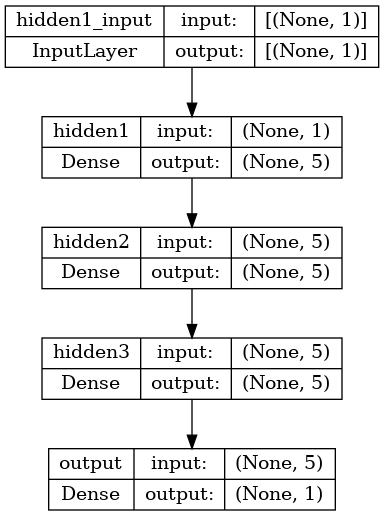

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

Build a model -> fit it -> evaluate it -> tweek the model -> fit it -> evaluate it -> tweek it ...

For evaluation:
> Visualize, visualize, visulaize

It's good idea to visualize:
* The data
* The model itself
* Training of a model
* The predictions of the model

In [11]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 116ms/step


array([[34.245274],
       [35.62153 ],
       [36.997776],
       [38.37403 ],
       [39.750282],
       [41.12654 ],
       [42.50279 ],
       [43.879044],
       [45.255295],
       [46.631542],
       [48.007793],
       [49.38404 ],
       [50.760303],
       [52.13655 ],
       [53.512802],
       [54.88906 ],
       [56.265312],
       [57.641556],
       [59.017815],
       [60.394066],
       [61.770325],
       [63.14657 ],
       [64.52283 ],
       [65.89908 ],
       [67.27532 ],
       [68.65158 ],
       [70.02784 ],
       [71.40408 ],
       [72.780334],
       [74.156586]], dtype=float32)

Visualize Predictions

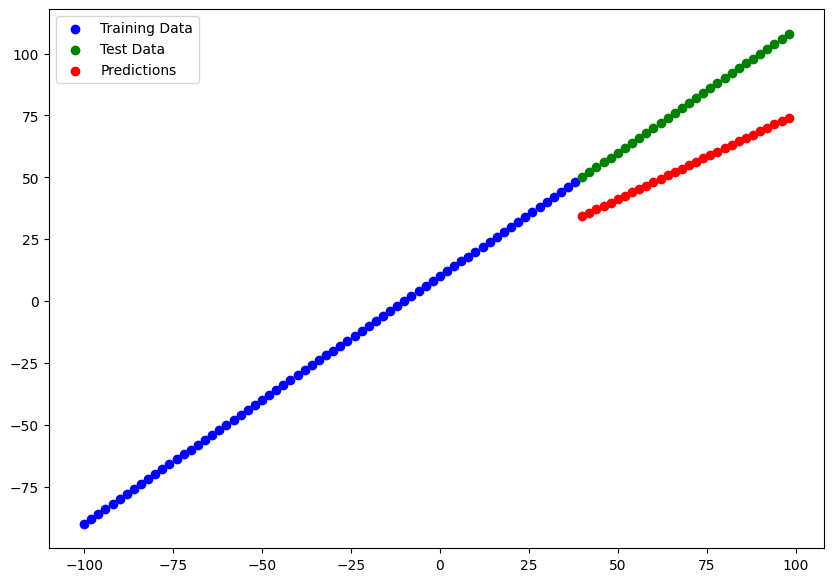

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(x=X_train, y=y_train, c='b', label='Training Data')
plt.scatter(x=X_test, y=y_test, c='g', label='Test Data')
plt.scatter(x=X_test, y=y_pred, c='r', label='Predictions')
plt.legend();


**Evaluating Predictions**

Evaluation metrics are used to evaluate models performance.

Two main metric for regression problems are:
- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**

The lower each of these values the better.

`model.evaluate()` returns the loss of the model as setup during compile step.

In [13]:
model.evaluate(X_test, y_test)

1/1 [==============================] - ETA: 0s - loss: 24.7991 - mae: 24.7991

1/1 [==============================] - 0s 224ms/step - loss: 24.7991 - mae: 24.7991


[24.799068450927734, 24.799068450927734]

In [14]:
y_test.shape, y_pred.shape

(TensorShape([30]), (30, 1))

In [15]:
# Calculate mae
mae = tf.metrics.mean_absolute_error(y_test, y_pred.squeeze()) # squeeze is used to make the shapes compatible
mae.numpy()

24.799068

In [16]:
# Calculate mse
mse = tf.metrics.mean_squared_error(y_test, y_pred.squeeze())
mse.numpy()

644.141

**Saving our Experimrnts**

`Tensorboard`

`Weights and Biases`

**Saving our model**

In [17]:
model.save('saved-model') # This is saved model format, allows us to resume training where we left

INFO:tensorflow:Assets written to: saved-model/assets


INFO:tensorflow:Assets written to: saved-model/assets


In [18]:
# Saving model using HDF5 format
model.save('model.h5')

/home/sie/miniconda3/envs/env1/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# # Downloading files from colab
# from google.colab import files 
# files.download('model.h5')
# !cp /source /destination

**A larger example**

In [20]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [24]:
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Creating model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                        metrics='mae')

history1 = insurance_model.fit(X_train, y_train, epochs=100, verbose=False)

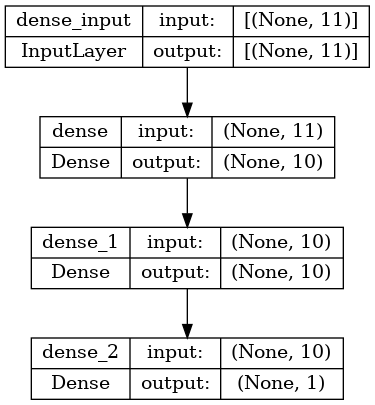

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(insurance_model, show_shapes=True)

In [28]:
# Check error on the test data
insurance_model.evaluate(X_test, y_test)

1/9 [==>...........................] - ETA: 1s - loss: 3422.6494 - mae: 3422.6494

9/9 [==============================] - 0s 2ms/step - loss: 5494.6738 - mae: 5494.6738


[5494.673828125, 5494.673828125]

In [29]:
# Second model
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss='mae',
                         optimizer='adam',
                         metrics='mae')

history2 = insurance_model2.fit(X_train, y_train, epochs=100, verbose=0)

In [30]:
insurance_model2.evaluate(X_test, y_test)

1/9 [==>...........................] - ETA: 1s - loss: 2938.0881 - mae: 2938.0881

9/9 [==============================] - 0s 2ms/step - loss: 4182.3481 - mae: 4182.3481


[4182.34814453125, 4182.34814453125]

**How long to train**

EarlyStoppingCallback -> model stops trining once it stops improving

**Preprocessing Data (normalization and standardization)**

In [31]:
df = pd.read_csv('insurance.csv')
df.describe()

FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

In [142]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn these numerical columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X and y
X = df.drop('charges', axis=1)
y = df['charges']

# Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer to our training data
ct.fit(X_train)

# Transform our data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [143]:
# Second model
tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss='mae',
                         optimizer='adam',
                         metrics='mae')

history3 = insurance_model3.fit(X_train_normal, y_train, epochs=100, verbose=0)
insurance_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3433.1758 - mae: 3433.1758


[3433.17578125, 3433.17578125]

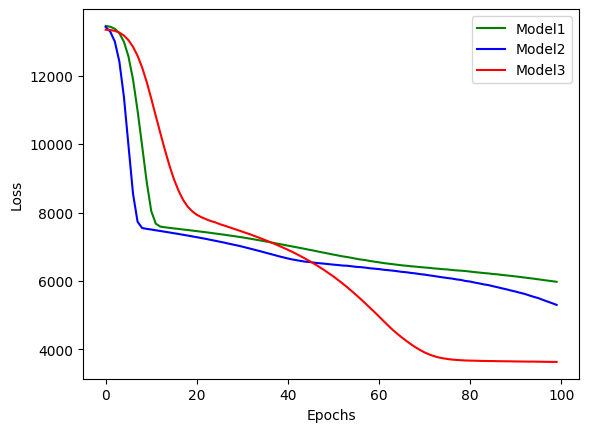

In [144]:
# Plot history
plt.plot(history1.history['loss'], color='g', label='Model1')
plt.plot(history2.history['loss'], color='b', label='Model2')
plt.plot(history3.history['loss'], color='r', label='Model3')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

## 3. Classification with Neural Networks

* Binary Classification
* Multiclass Classification
* Multilabel Classification

In [5]:
from sklearn.datasets import make_circles

# Number of samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

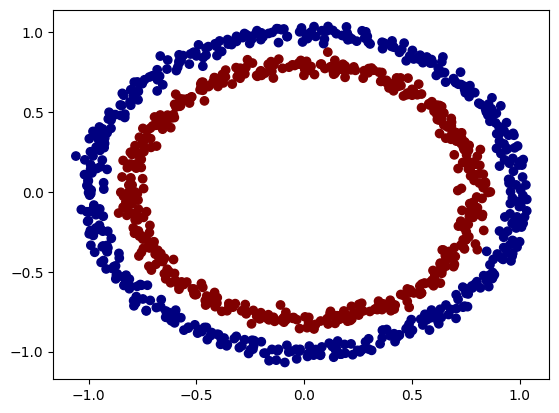

In [9]:
import pandas as pd
df = pd.DataFrame({'x0': X[:, 0], 'x1':X[:, 1], 'labels':y})

import matplotlib.pyplot as plt
plt.scatter(df.x0, df.x1, c=df.labels, cmap='jet');

In [53]:
# Creating a model
import tensorflow as tf

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

history1 = model1.fit(X, y, epochs=200, verbose=0)

313/313 [==============================] - 1s 2ms/step
Doing binary classification


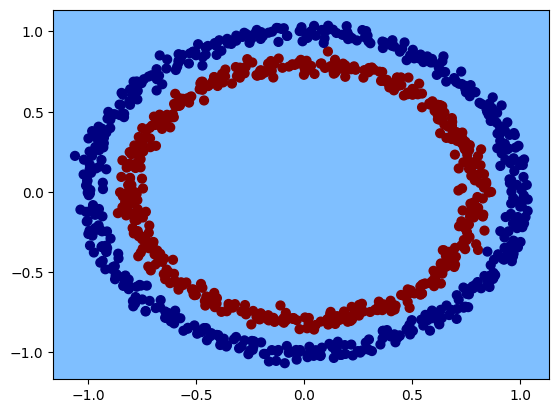

In [54]:
import numpy as np

def plot_decision_boundary(model, x, y):

    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Make data
    X_train = np.c_[xx.flatten(), yy.flatten()]

    # Make predictions
    y_pred = model.predict(X_train)

    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap='jet', alpha=0.5)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='jet')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    


plot_decision_boundary(model1, X, y)